In [6]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [7]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/docs/inputs/shared-pyplot-files/")
from pyplot_parameters import colors, complete_panel, save_figure, add_subplotlabels, set_boundaries
                              # set_boundaries
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[2][-1]
tutorial_name = path_in_folder.split("/")[3]
path_figures = "/docs/sphinx/source/tutorials/figures/level" + level + "/" + tutorial_name + "/"
print("level:" , level, "& tutorial name:", tutorial_name)
print("figures will be saved in", path_figures)

level: 1 & tutorial name: breaking-a-carbon-nanotube
figures will be saved in /docs/sphinx/source/tutorials/figures/level1/breaking-a-carbon-nanotube/


In [8]:
if os.path.exists("output_number_bond_vs_time.dat"):
    number = np.loadtxt("output_number_bond_vs_time.dat")
    time, number = number.T
    time /= 2000 # ps
    if os.path.exists("data_plot/") is False:
        os.mkdir("data_plot/")
    np.savetxt("data_plot/number_bond_vs_time.dat", np.vstack([time, number]).T)
else:
    time, number = np.loadtxt("data_plot/number_bond_vs_time.dat").T

In [9]:
if os.path.exists("output_length_bond_vs_time.dat"):
    length = np.loadtxt("output_length_bond_vs_time.dat")
    time, length = length.T
    time /= 2000 # ps
    if os.path.exists("data_plot/") is False:
        os.mkdir("data_plot/")
    np.savetxt("data_plot/length_bond_vs_time.dat", np.vstack([time, length]).T)
else:
    time, length = np.loadtxt("data_plot/length_bond_vs_time.dat").T

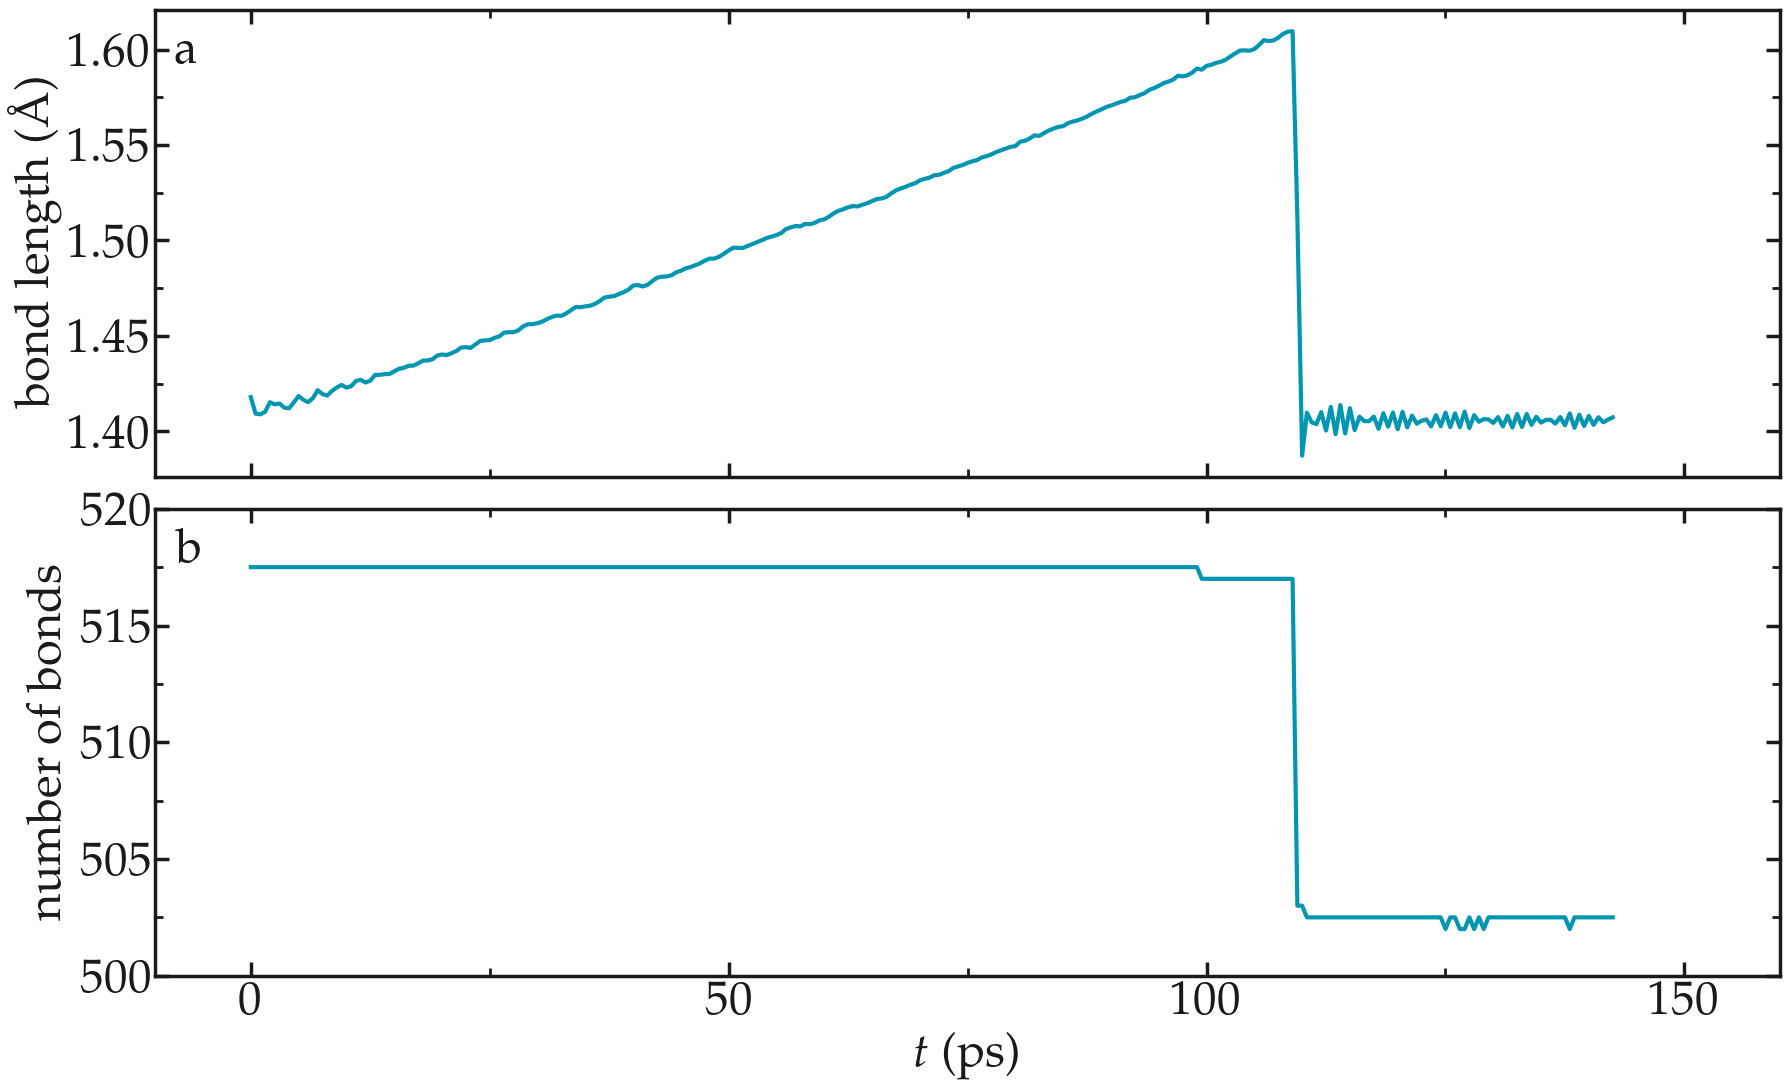

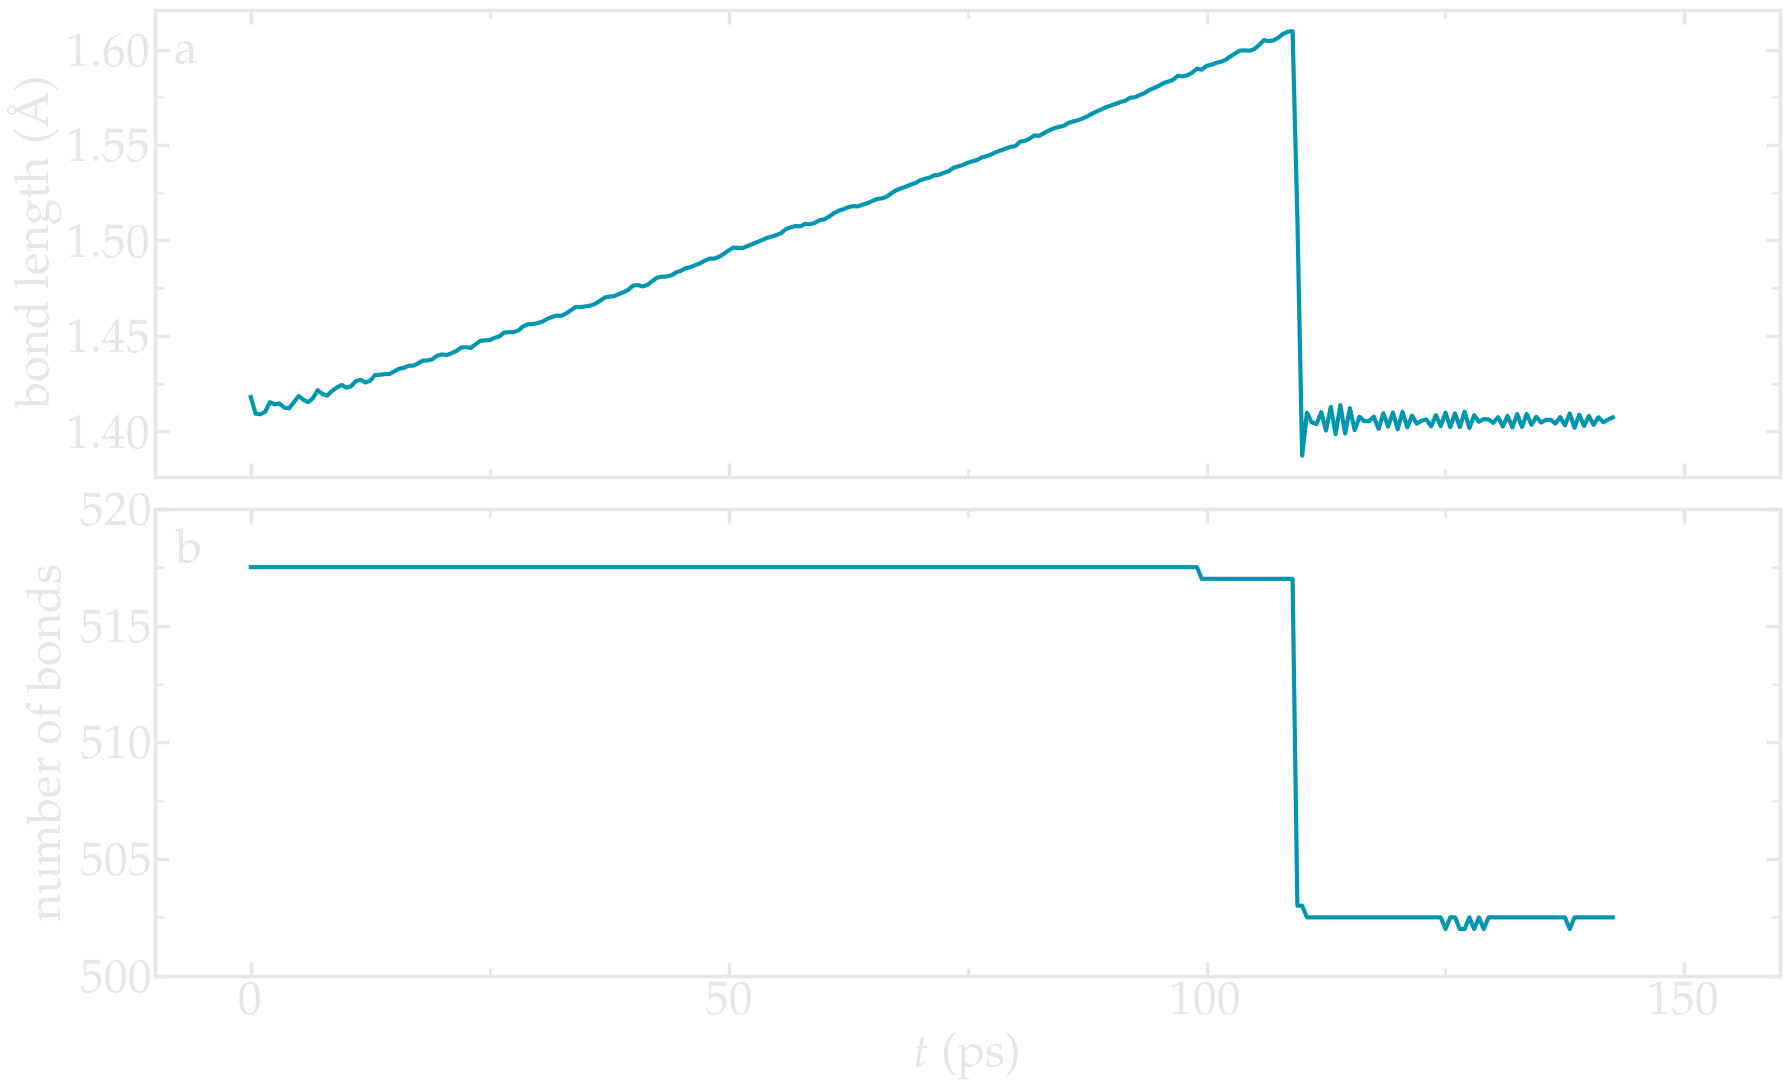

In [13]:
filename = "bond"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,11))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(time, length, color=colors["myblue"], linewidth=3)
    complete_panel(ax[-1], None, r'bond length (\AA)', legend=False, axis_color=mygray, cancel_x=True)
    set_boundaries(plt, x_ticks=np.arange(0, 160, 50), x_boundaries=(-10, 160))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(time, number, color=colors["myblue"], linewidth=3)
    complete_panel(ax[-1], r'$t$ (ps)', r'number of bonds', legend=False, axis_color=mygray)
    add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    set_boundaries(plt, y_ticks=np.arange(500, 525, 5), x_ticks=np.arange(0, 160, 50), x_boundaries=(-10, 160))
    save_figure(fig, mode, git_path, path_figures, filename)